Yearly Network Vulnerability

In [19]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from utils import *


sns.set_theme(
    style="whitegrid",    # or "ticks", "darkgrid", "white", "dark"
    palette="colorblind", # or "muted", "pastel", "deep", "bright"
    context="talk"        # or "paper", "notebook", "poster"
)

In [4]:
df = pd.read_csv(f'{data_paths["graphs_data"]}/labels-affected_importers.csv')

In [5]:
df.head()

,year,product_code,country_id,label
0,2012,1,4,not_affected
1,2012,1,8,not_affected
2,2012,1,10,not_affected
3,2012,1,12,not_affected
4,2012,1,16,not_affected


In [6]:
yearly_df = df[["year", "country_id", "label"]].groupby(["year", "country_id"]).min().reset_index()

In [15]:
yearly_affected_ratio = yearly_df[yearly_df.label == "affected_importer"].groupby("year").size() / 276
yearly_affected_ratio = yearly_affected_ratio.reset_index().rename(columns={0: "affected_ratio"})
yearly_affected_ratio["year"] = yearly_affected_ratio["year"] + 1

In [32]:
preds = []
for i in range(1, 11):
    p = json.load(open(f"{data_paths['results']}/GCN/multi-graph-total/GCN-multi-graph-total-{i}-predictions.json"))["predictions"]
    preds.append(sum(p) / 276)
preds = sum(preds) / 10

''

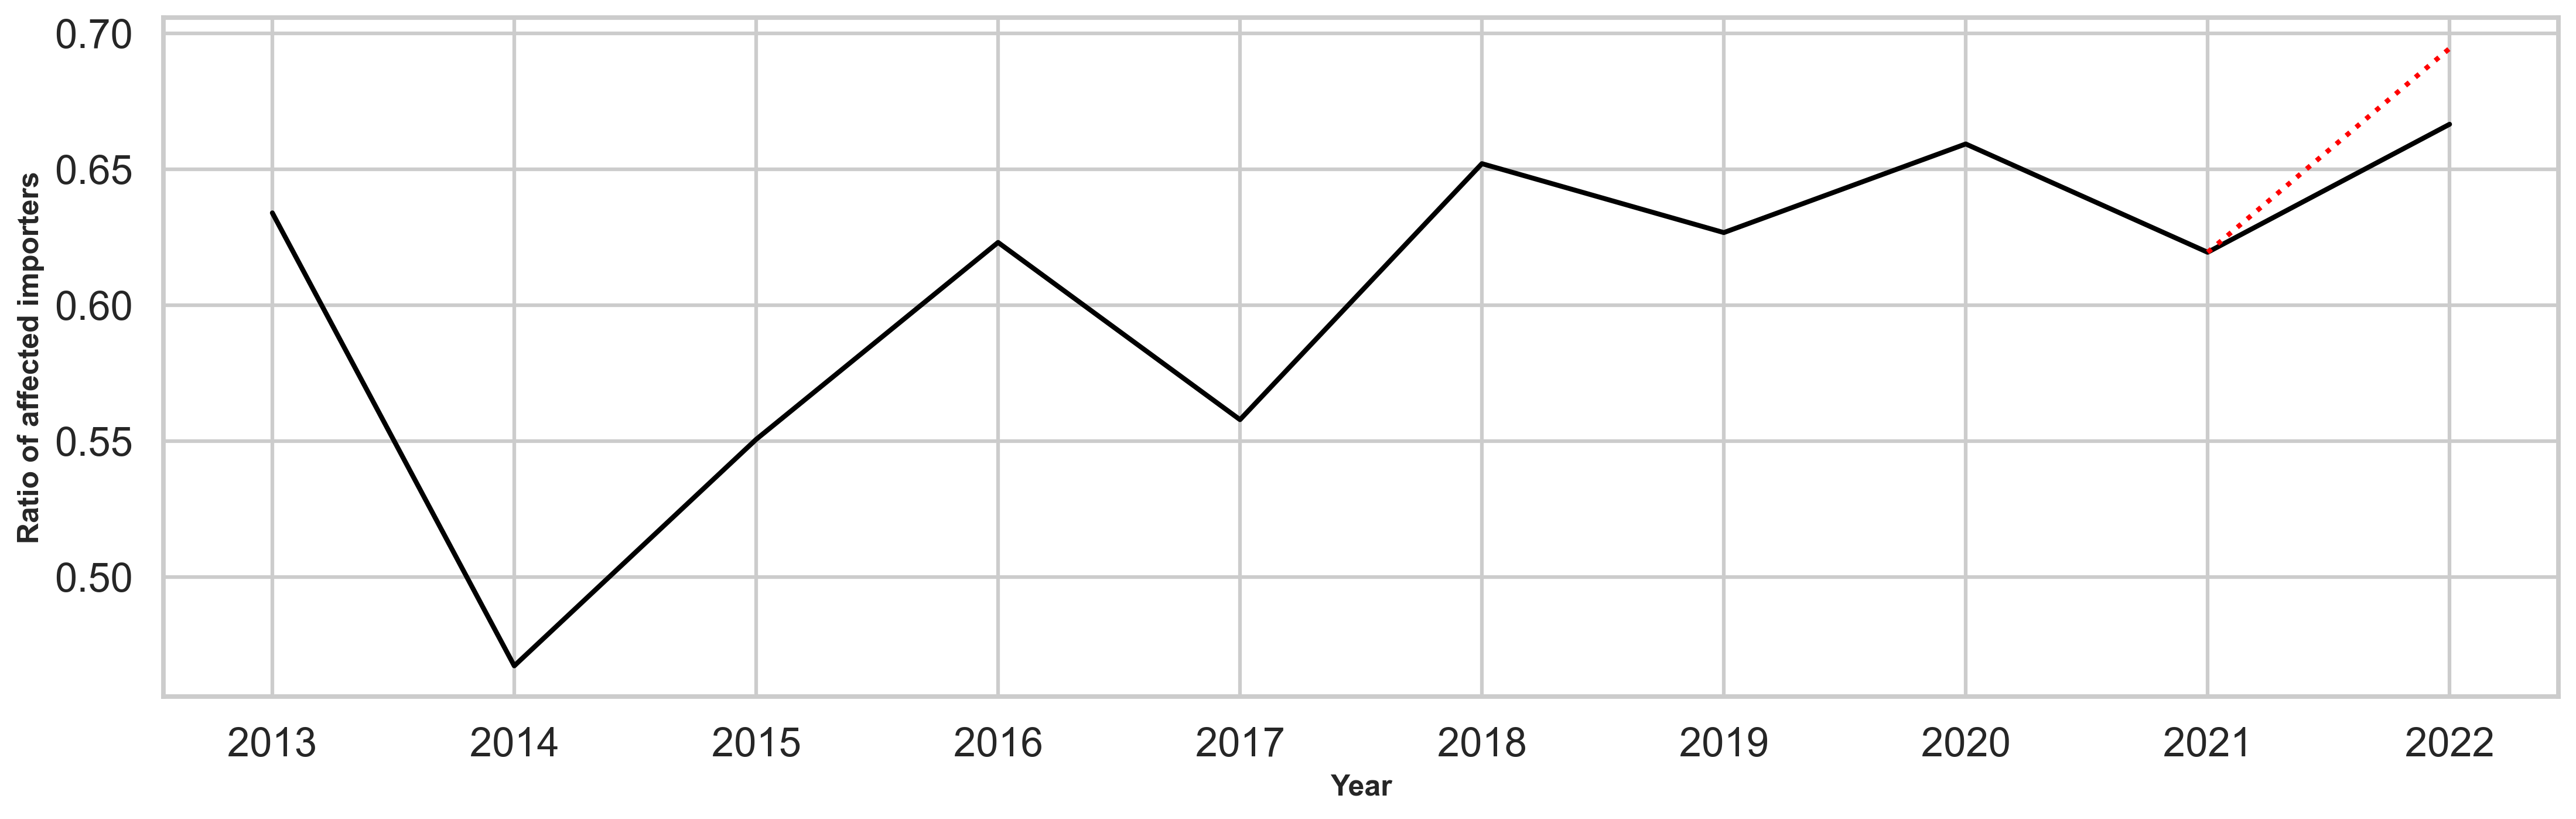

In [36]:
fig, ax = plt.subplots(figsize=(15, 5), dpi=300)
sns.lineplot(data=yearly_affected_ratio, x="year", y="affected_ratio", ax=ax, errorbar=None, linewidth=2, color="black")
sns.lineplot(x=[2021, 2022], y=[yearly_affected_ratio.affected_ratio.iloc[-2], preds], ax=ax, errorbar=None, linewidth=2, linestyle=":", color="red")
ax.set_xticks(range(2013, 2023))
ax.set_xlabel("Year", fontsize=12, fontweight="bold")
ax.set_ylabel("Ratio of affected importers", fontsize=12, fontweight="bold")
plt.tight_layout()
;

In [109]:
all_combinations = df[["year", "product_code"]]
all_combinations.drop_duplicates(inplace=True)
commodity_df = df[df.label == "affected_importer"].groupby(["year", "product_code"]).size() / 276
commodity_df = commodity_df.reset_index().rename(columns={0: "affected_ratio"})
commodity_df = all_combinations.merge(commodity_df, how="left", on=["year", "product_code"])
commodity_df.fillna(0, inplace=True)
commodity_df.head()

C:\Users\ginof\AppData\Local\Temp\ipykernel_14852\3064612709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_combinations.drop_duplicates(inplace=True)


,year,product_code,affected_ratio
0,2012,1,0.036232
1,2012,2,0.010870
2,2012,3,0.007246
3,2012,4,0.000000
4,2012,5,0.007246


In [110]:
commodity_df_heatmap = commodity_df.pivot_table(index="year", columns="product_code", values="affected_ratio").T

In [112]:
commodity_df_heatmap

year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
product_code,,,,,,,,,,
1,0.036232,0.014493,0.010870,0.014493,0.021739,0.043478,0.007246,0.115942,0.018116,0.072464
2,0.010870,0.000000,0.032609,0.000000,0.010870,0.000000,0.018116,0.010870,0.018116,0.003623
3,0.007246,0.000000,0.000000,0.007246,0.021739,0.000000,0.000000,0.014493,0.000000,0.014493
4,0.000000,0.000000,0.000000,0.000000,0.003623,0.000000,0.007246,0.000000,0.021739,0.000000
5,0.007246,0.018116,0.054348,0.007246,0.003623,0.018116,0.014493,0.076087,0.003623,0.014493
...,...,...,...,...,...,...,...,...,...,...
93,0.202899,0.043478,0.014493,0.039855,0.021739,0.018116,0.123188,0.300725,0.000000,0.057971
94,0.000000,0.000000,0.003623,0.010870,0.007246,0.014493,0.076087,0.003623,0.010870,0.007246
95,0.003623,0.000000,0.000000,0.000000,0.003623,0.000000,0.000000,0.036232,0.050725,0.007246


''

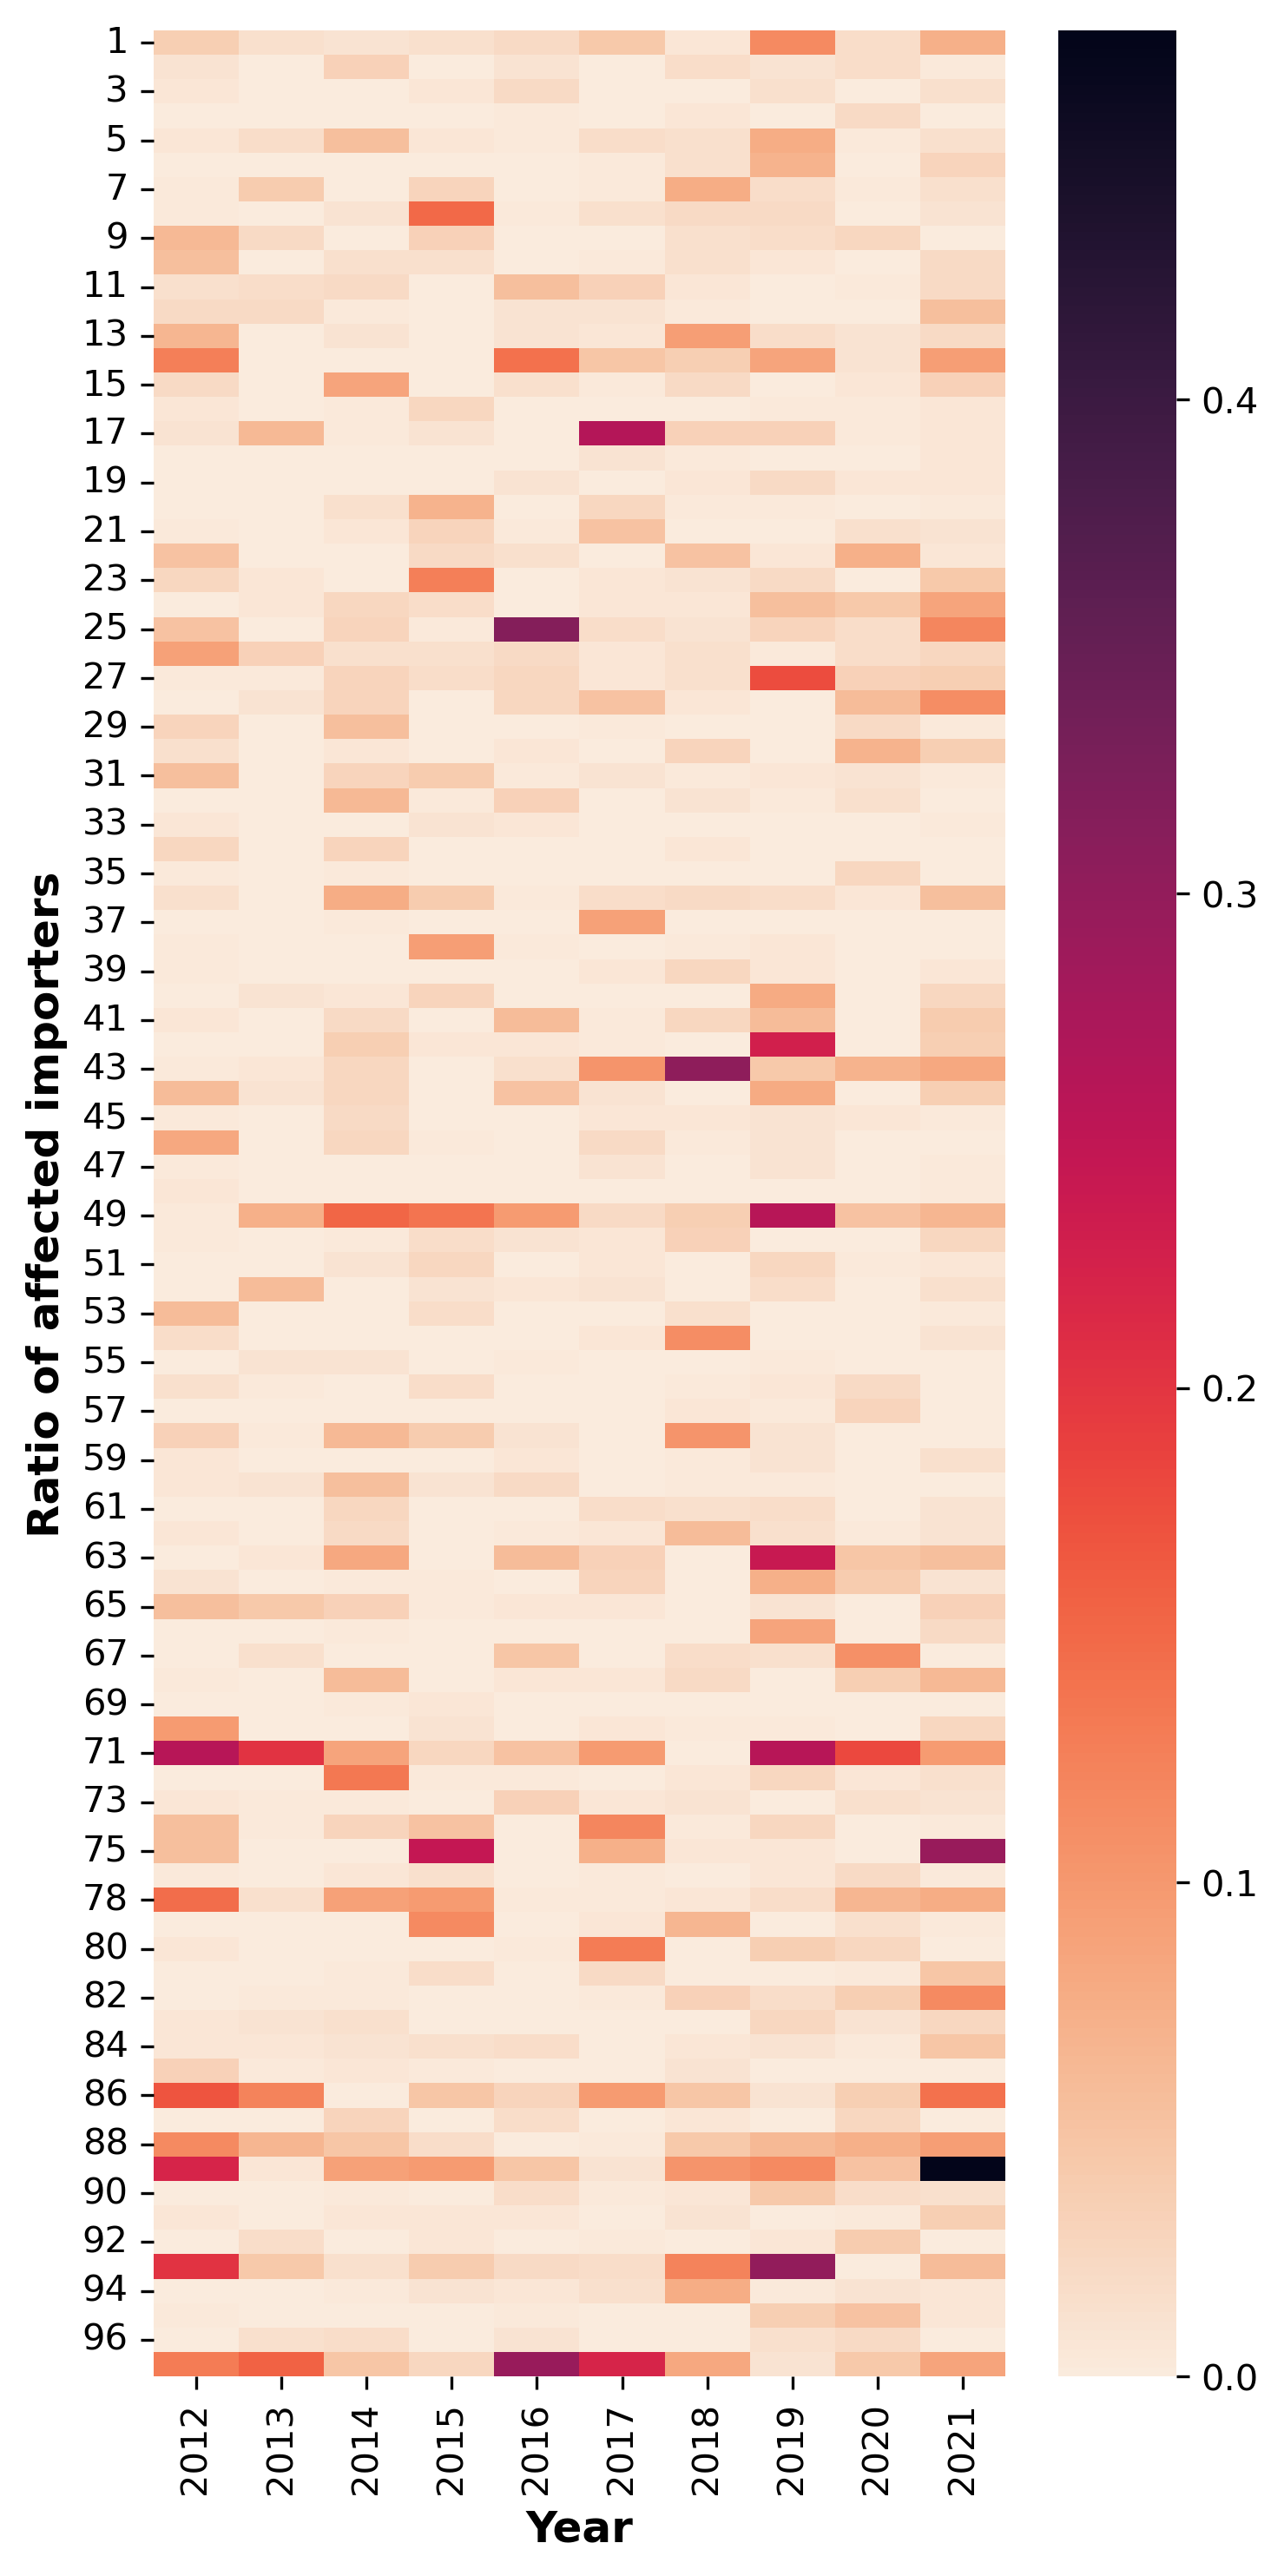

In [123]:
fig, ax = plt.subplots(figsize=(5,10) , dpi=300)
sns.heatmap(data=commodity_df_heatmap, ax=ax, square=False, cmap="rocket_r")
ax.set_xlabel("Year", fontsize=12, fontweight="bold")
ax.set_ylabel("Ratio of affected importers", fontsize=12, fontweight="bold")
plt.tight_layout()
;